In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [44]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\powergrid_IND.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [45]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [46]:
data.shape

(908, 25)

In [47]:
#We are having 908 rows and 25 columns

In [48]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [49]:
#we see there is lot of missing values and NAN

In [50]:
data=data.drop('country',axis=1)

In [51]:
data=data.drop('country_long',axis=1)

In [52]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.isna().sum()


name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [54]:

#We are seeing lot of missing values and unimportant data,eradicating which is not required to the present file.
data=data.drop('estimated_generation_gwh',axis=1)

In [55]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,...,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,...,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,...,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.isna().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
other_fuel3               908
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
wepp_id                   908
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [57]:
data=data.drop('url',axis=1)
data=data.drop('wepp_id',axis=1)

In [58]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data.isna().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
other_fuel3               908
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [60]:

data=data.drop('gppd_idnr',axis=1)

In [61]:
data

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.isna().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
other_fuel3               908
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [63]:


data=data.drop('name',axis=1)
data=data.drop('other_fuel1',axis=1)
data=data.drop('other_fuel2',axis=1)
data=data.drop('other_fuel3',axis=1)
data=data.drop('geolocation_source',axis=1)
data=data.drop('owner',axis=1)



In [64]:


data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data['longitude'].fillna(data['longitude'].mean(),inplace=True)

In [66]:
data.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
source                      0
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [67]:
data['commissioning_year'].fillna(data['commissioning_year'].median(),inplace=True)

In [68]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2000.0,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,2000.0,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mean(),inplace=True)

In [70]:
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)


In [71]:
data.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
source                      0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [72]:
data=data.drop('generation_data_source',axis=1)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
categorical_column=['primary_fuel']

In [75]:
le=LabelEncoder()
data['categorical_column']=data[categorical_column].apply(lambda col: le.fit_transform(col))

In [76]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,categorical_column
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,Wind,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,1
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
905,25.5,15.2758,75.5811,Wind,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [77]:
data['primary_fuel']=data['primary_fuel'].str.strip()

In [78]:
data.value_counts('primary_fuel')

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
dtype: int64

In [79]:
le=LabelEncoder()
data['categorical_column']=data[categorical_column].apply(lambda col: le.fit_transform(col))

In [80]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,categorical_column
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,Wind,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,1
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
905,25.5,15.2758,75.5811,Wind,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [81]:
number=LabelEncoder()
data['primary_fuel']=number.fit_transform(data['primary_fuel'].astype('str'))

In [82]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,categorical_column
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
1,98.0,24.7663,74.6090,1,2000.0,Ultratech Cement ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,7,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,Central Electricity Authority,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,1
904,3.0,12.8932,78.1654,6,2000.0,Karnataka Power Corporation Limited,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,6
905,25.5,15.2758,75.5811,7,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7
906,80.0,24.3500,73.7477,1,2000.0,Hindustan Zinc ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


<AxesSubplot:>

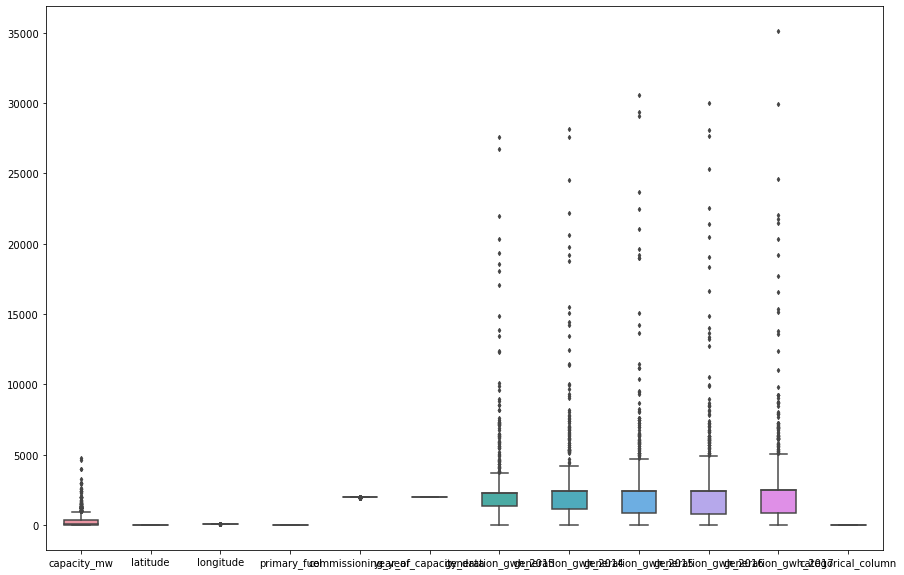

In [83]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.5,ax=ax,fliersize=3)

ValueError: could not convert string to float: 'National Renewable Energy Laboratory'

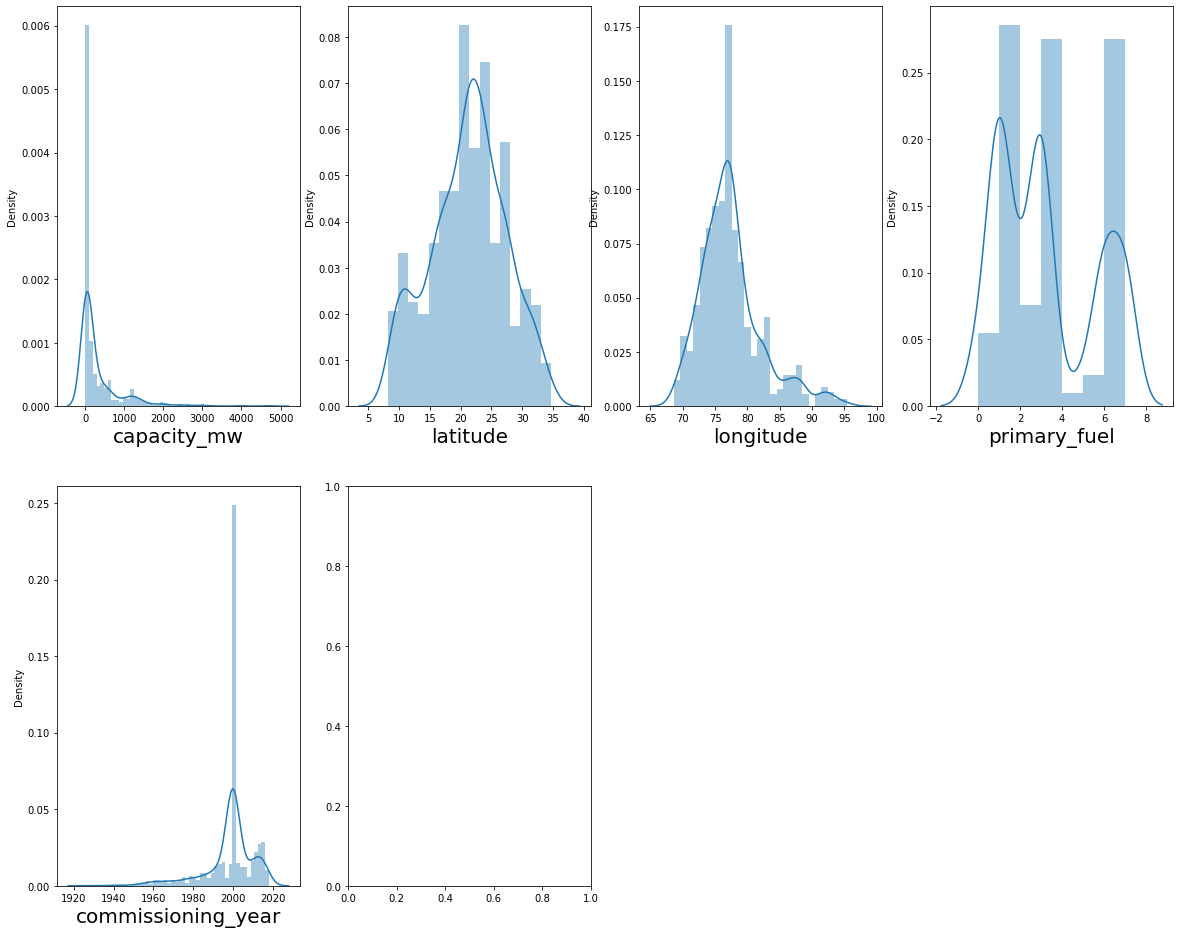

In [84]:
#Lets check how the data is distributed for every coulumn
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

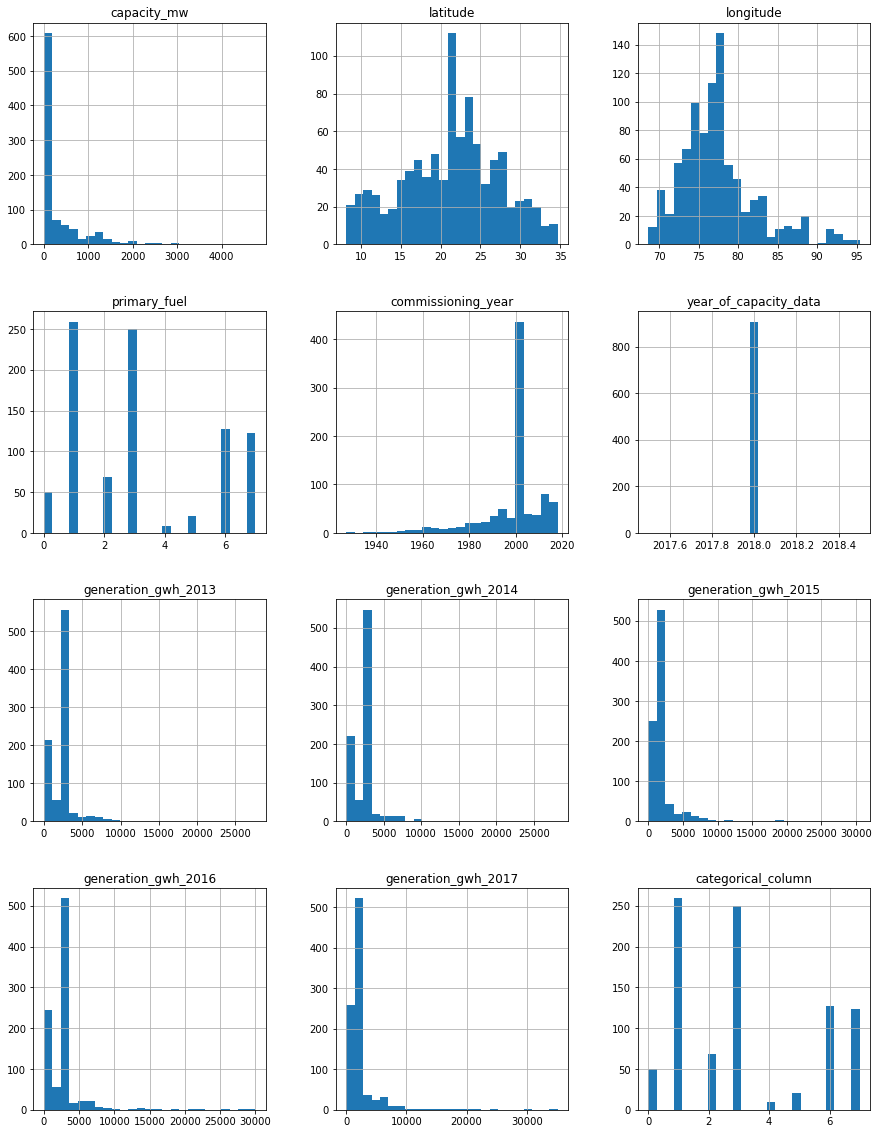

In [85]:
#Visualising the the feature on that of the label
data.hist(figsize=(15,20) , bins = 25)
plt.show()

In [86]:
x = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']

In [87]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

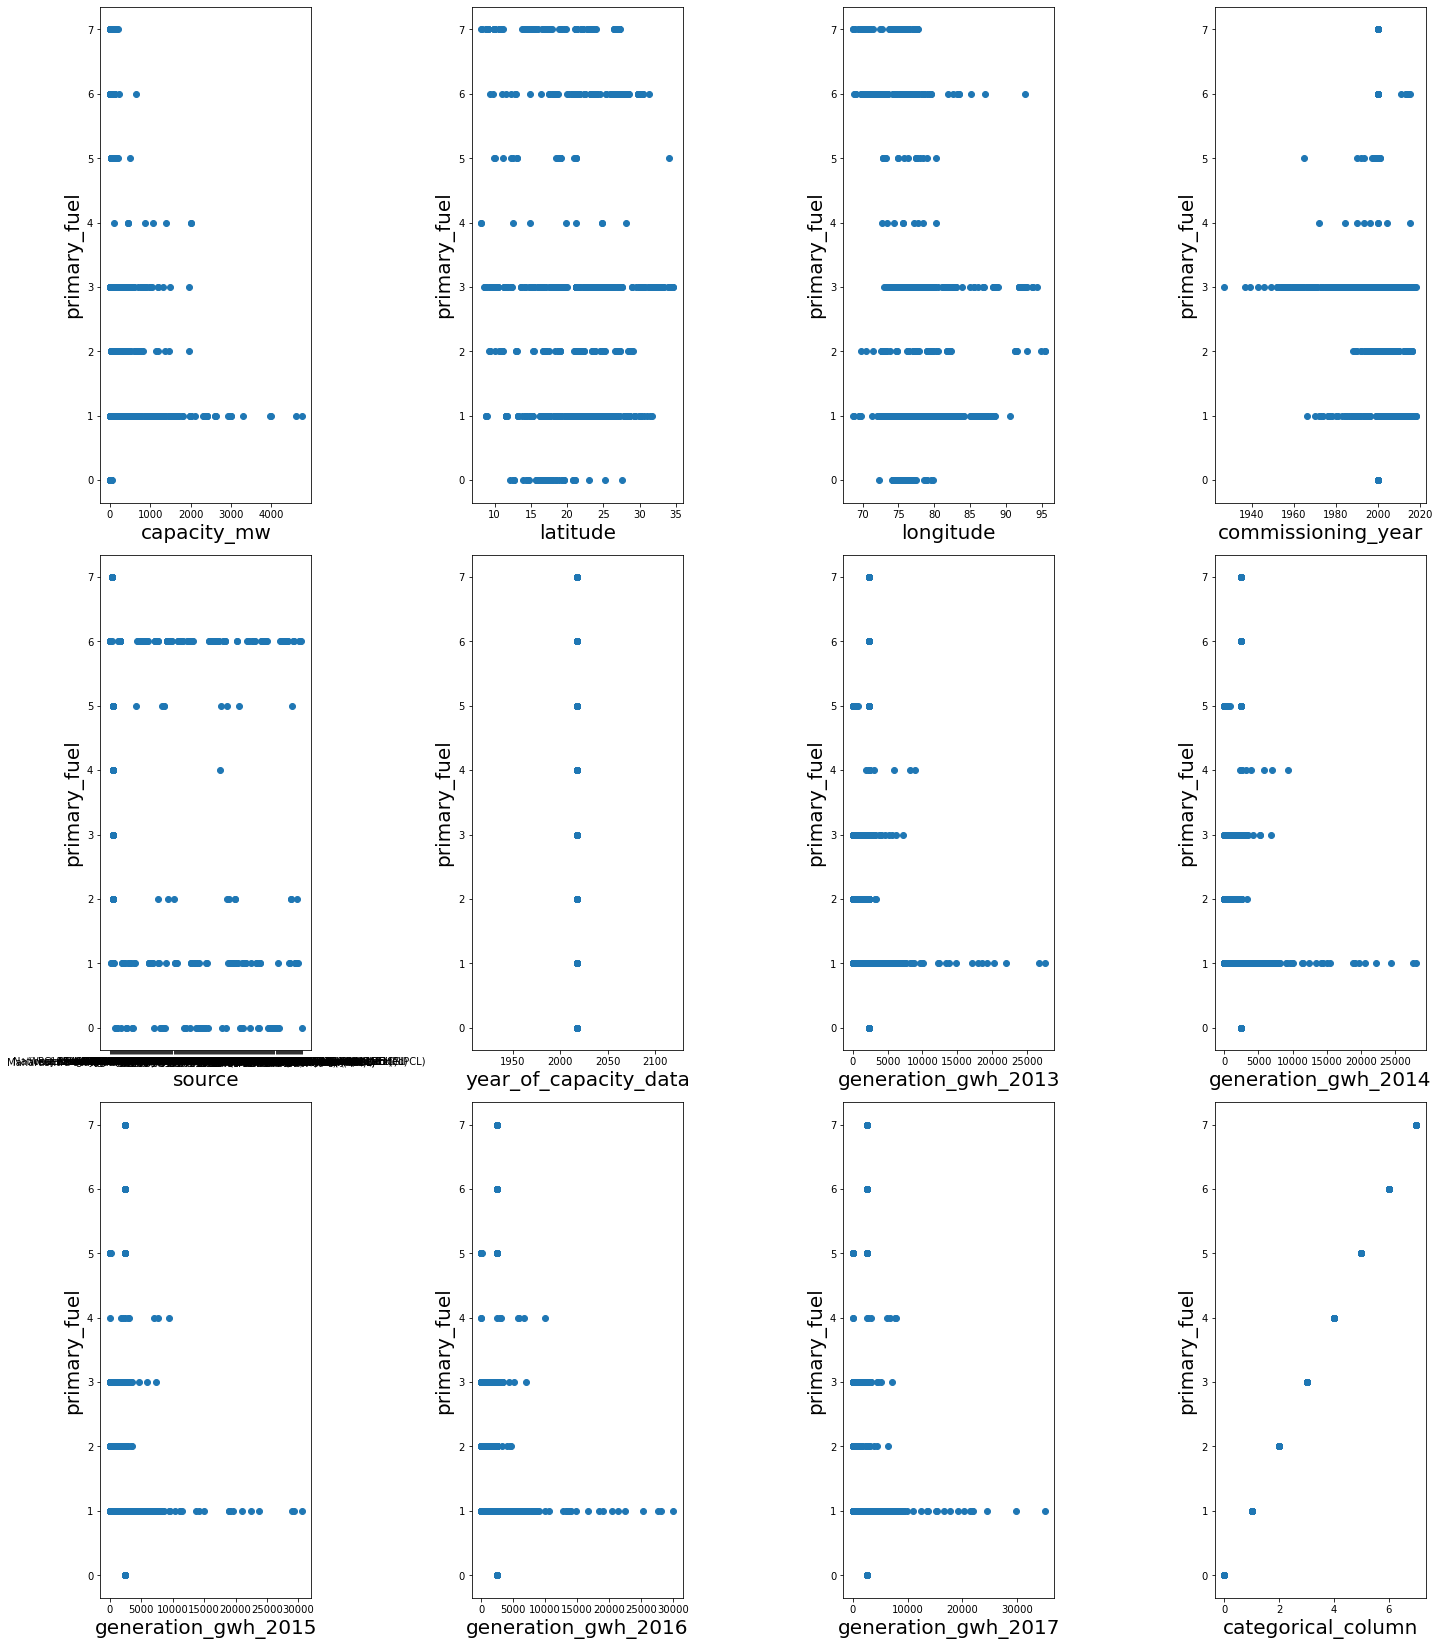

In [88]:
#relationship between feature and label
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax =plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [89]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

ValueError: could not convert string to float: 'National Renewable Energy Laboratory'

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    int32  
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    object 
 6   year_of_capacity_data  908 non-null    float64
 7   generation_gwh_2013    908 non-null    float64
 8   generation_gwh_2014    908 non-null    float64
 9   generation_gwh_2015    908 non-null    float64
 10  generation_gwh_2016    908 non-null    float64
 11  generation_gwh_2017    908 non-null    float64
 12  categorical_column     908 non-null    int32  
dtypes: float64(10), int32(2), object(1)
memory usage: 85.2+ KB


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    int32  
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    object 
 6   year_of_capacity_data  908 non-null    float64
 7   generation_gwh_2013    908 non-null    float64
 8   generation_gwh_2014    908 non-null    float64
 9   generation_gwh_2015    908 non-null    float64
 10  generation_gwh_2016    908 non-null    float64
 11  generation_gwh_2017    908 non-null    float64
 12  categorical_column     908 non-null    int32  
dtypes: float64(10), int32(2), object(1)
memory usage: 85.2+ KB


In [92]:
data=data.drop('source',axis=1)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    int32  
 4   commissioning_year     908 non-null    float64
 5   year_of_capacity_data  908 non-null    float64
 6   generation_gwh_2013    908 non-null    float64
 7   generation_gwh_2014    908 non-null    float64
 8   generation_gwh_2015    908 non-null    float64
 9   generation_gwh_2016    908 non-null    float64
 10  generation_gwh_2017    908 non-null    float64
 11  categorical_column     908 non-null    int32  
dtypes: float64(10), int32(2)
memory usage: 78.2 KB


In [94]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

ValueError: could not convert string to float: 'National Renewable Energy Laboratory'

In [95]:
x = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']

In [97]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,3.134926,capacity_mw
1,1.011890,latitude
2,1.167935,longitude
3,1.066080,commissioning_year
4,NaN,year_of_capacity_data
5,15.735870,generation_gwh_2013
6,34.063443,generation_gwh_2014
7,27.864378,generation_gwh_2015
8,34.211341,generation_gwh_2016
9,16.143547,generation_gwh_2017


In [98]:
data=data.drop('year_of_capacity_data',axis=1)
data=data.drop('generation_gwh_2014',axis=1)


In [100]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [101]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,3.134926,capacity_mw
1,1.011890,latitude
2,1.167935,longitude
3,1.066080,commissioning_year
4,NaN,year_of_capacity_data
5,15.735870,generation_gwh_2013
6,34.063443,generation_gwh_2014
7,27.864378,generation_gwh_2015
8,34.211341,generation_gwh_2016
9,16.143547,generation_gwh_2017


In [104]:
x = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']


In [105]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [106]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,3.134543,capacity_mw
1,1.010309,latitude
2,1.166726,longitude
3,1.065565,commissioning_year
4,5.173417,generation_gwh_2013
5,20.020944,generation_gwh_2015
6,33.522882,generation_gwh_2016
7,15.672731,generation_gwh_2017
8,1.354505,categorical_column


In [107]:
data=data.drop('generation_gwh_2017',axis=1)

In [108]:
x = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']


In [109]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [110]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,2.931533,capacity_mw
1,1.010305,latitude
2,1.164760,longitude
3,1.065208,commissioning_year
4,5.142051,generation_gwh_2013
5,19.964651,generation_gwh_2015
6,18.455755,generation_gwh_2016
7,1.346570,categorical_column


In [111]:
data=data.drop('generation_gwh_2015',axis=1)

In [112]:
x = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']


In [113]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [114]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,2.923553,capacity_mw
1,1.009654,latitude
2,1.160718,longitude
3,1.063766,commissioning_year
4,4.273602,generation_gwh_2013
5,5.592485,generation_gwh_2016
6,1.345429,categorical_column


# Using Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [121]:
regression = LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

In [122]:
regression.score(x_train,y_train)

0.8972099853157122

In [123]:
regression.score(x_test,y_test)

0.8986784140969163

In [124]:
y_pred = regression.predict(x_test)

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_test,y_pred)

0.9705963310179563

# Using Regularization LASSO and Ridge

In [128]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [129]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=1000,normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [130]:
alpha = lasscv.alpha_
alpha

8.849443787848987e-05

In [131]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.849443787848987e-05)

In [132]:
lasso_reg.score(x_test,y_test)

0.9999999985679356

In [133]:
#Using ridge now

In [134]:
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.97927728, 5.12083073, 5.91741569, 5.06298461, 0.07467561,
       3.16586674, 3.36020435, 0.02499898, 2.86808592, 0.39712209,
       8.8608782 , 8.47153822, 3.6599326 , 7.27769199, 5.53156899,
       1.47169047, 9.76774056, 8.26111535, 9.75583287, 4.37723139,
       0.62721163, 1.8810342 , 5.38969553, 1.65412225, 2.78610303,
       3.9911432 , 1.42606357, 2.93210693, 0.35843723, 6.48749933,
       8.73304028, 5.69207749, 5.90034523, 5.45232884, 7.37062607,
       7.33090867, 6.35697121, 6.03233252, 3.98069152, 9.6029188 ,
       9.86517759, 8.33868372, 0.29217009, 8.83213677, 8.26550019,
       2.93305909, 5.78671817, 2.95060207, 1.21679109, 8.75536166]),
        cv=10, normalize=True)

In [135]:
ridgecv.alpha_

0.024998979305752567

# Using Random Forrest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [139]:
#Randomforest classifier
rff = RandomForestClassifier(random_state = 0)
rff.fit(x_train, y_train)

y_pred_train = rff.predict(x_train)
y_pred_test = rff.predict(x_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 0.9911894273127754


In [141]:
#AUC ROC Curve
from sklearn import metrics
probs = rff.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

ValueError: multiclass format is not supported

# Gradient Boosting Classifier

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [144]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 100.00%
------------------------
Classification report :
               0      1     2      3    4     5     6     7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
support    40.0  198.0  47.0  180.0  7.0  19.0  94.0  96.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        681.0         681.0  
________________________________________
Confusion matrix : 
 [[ 40   0   0   0   0   0   0   0]
 [  0 198   0   0   0   0   0   0]
 [  0   0  47   0   0   0   0   0]
 [  0   0   0 180   0   0   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  19   0   0]
 [  0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0  

In [145]:
#We are getting 99.56% 

In [146]:
#Let me check by hyperparameter tuning if I can get better efficieny :
#Tuning the data :
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1,1,0.1),
    'min_samples_split' : range(4,8,2)
}

In [148]:
from sklearn.model_selection import train_test_split , GridSearchCV
grid = GridSearchCV(gbdt_clf , param_grid = grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [149]:
grid.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 4, 'min_samples_split': 4}

In [151]:
gbdt_clf = GradientBoostingClassifier(
    max_depth = 4,min_samples_split=4, learning_rate=0.30000000000000004)
gbdt_clf.fit(x_train , y_train)
pred = gbdt_clf.predict(x_train)

In [154]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 100.00%
------------------------
Classification report :
               0      1     2      3    4     5     6     7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
support    40.0  198.0  47.0  180.0  7.0  19.0  94.0  96.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        681.0         681.0  
________________________________________
Confusion matrix : 
 [[ 40   0   0   0   0   0   0   0]
 [  0 198   0   0   0   0   0   0]
 [  0   0  47   0   0   0   0   0]
 [  0   0   0 180   0   0   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  19   0   0]
 [  0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0  

In [155]:
#The test result seem to be the same

In [156]:
#We see it the same no much difference after the Hyperparameter

# Decission Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        27

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [170]:
#I would choose Gradient Booster Classification

In [171]:
import pickle
global_power = 'finalized_model.pickle'
pickle.dump(gbdt_clf,open(global_power,'wb'))

In [172]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [174]:
loaded_model=pickle.load(open(global_power,'rb'))
a=loaded_model.predict(scaler.transform(x))

# Thank You